In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

In [2]:
# Importing training dataset
train_set = pd.read_csv("C:/Users/Yogendra/Downloads/Salary_Data_Train.csv")
train_set.shape

(30161, 14)

In [3]:
# Importing testing dataset
test_set = pd.read_csv("C:/Users/Yogendra/Downloads/SalaryData_Test(1).csv")
test_set.shape

(15060, 14)

In [4]:
# Creating whole data by merging Train and Test Data
salary = train_set.append(test_set)
salary.reset_index(drop='index',inplace=True)
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
#EDA

In [6]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [8]:
# Check for Null values
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
# Check for duplicate values
salary[salary.duplicated()].shape

(5982, 14)

In [10]:
salary = salary.drop_duplicates()
salary.reset_index(inplace=True,drop=True)
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
39235,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
39236,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
39237,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
sal_cat = salary.select_dtypes(include=['object'])
sal_cat

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
39234,Local-gov,Masters,Divorced,Other-service,Not-in-family,White,Male,United-States,<=50K
39235,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
39236,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
39237,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [12]:
num_feat=[feature for feature in salary.columns if salary[feature].dtypes != 'O']

sal_num = salary[num_feat]
sal_num

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
39234,48,14,0,0,40
39235,33,13,0,0,40
39236,39,13,0,0,36
39237,44,13,5455,0,40


In [13]:
discrete=[feature for feature in num_feat if len(salary[feature].unique())<25]
discrete

['educationno']

In [14]:
continuous=[feature for feature in num_feat if feature not in discrete]
continuous

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [15]:
data_cont = sal_num[continuous]
data_cont

,age,capitalgain,capitalloss,hoursperweek
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
39234,48,0,0,40
39235,33,0,0,40
39236,39,0,0,36
39237,44,5455,0,40


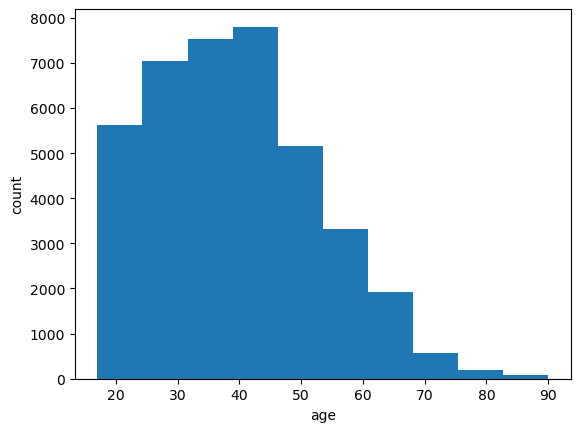

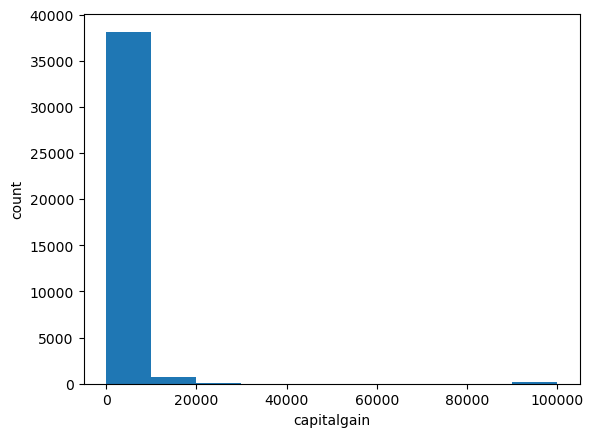

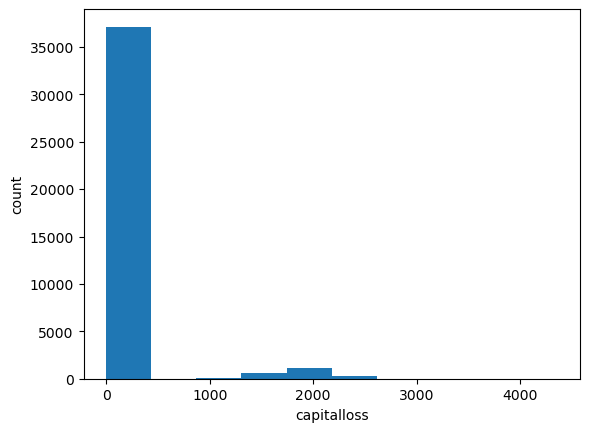

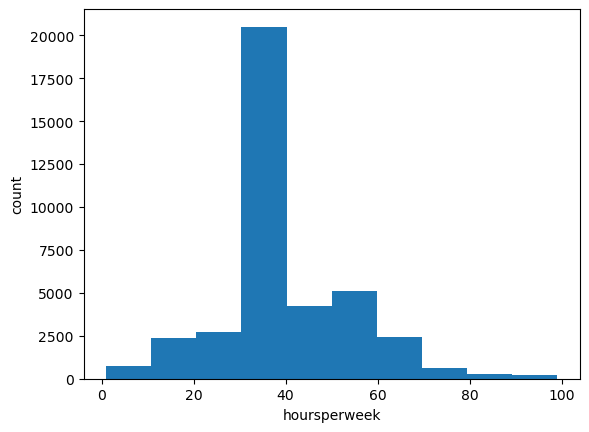

In [16]:
for feature in data_cont.columns:
    plt.figure()
    plt.hist(data_cont[feature])
    plt.xlabel(feature)
    plt.ylabel("count")

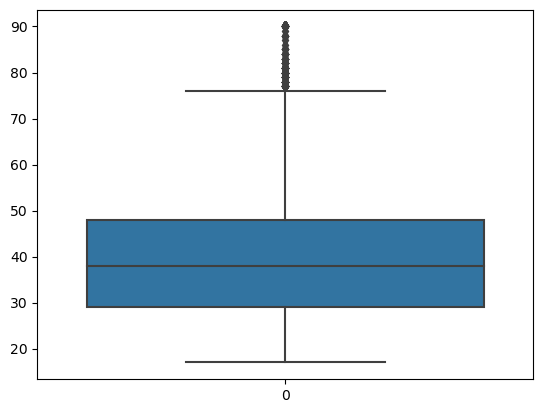

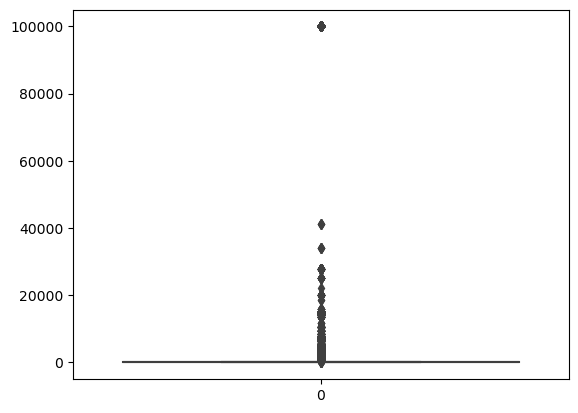

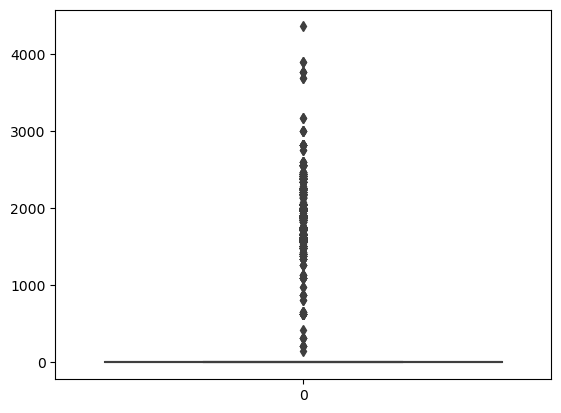

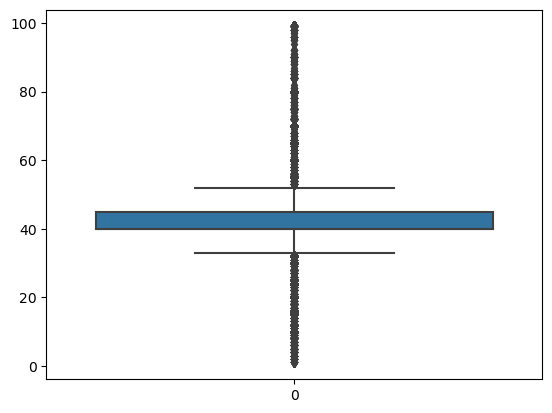

In [17]:
for feature in data_cont.columns:
    plt.figure()
    sb.boxplot(data_cont[feature])

In [18]:
# There are outliers but we need to keep them as they are very large in numbers and removing them will mean significant data loss

In [19]:
data_cont.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.075495,0.049876,0.066927
capitalgain,0.075495,1.000000,-0.036791,0.082977
capitalloss,0.049876,-0.036791,1.000000,0.050638
hoursperweek,0.066927,0.082977,0.050638,1.000000


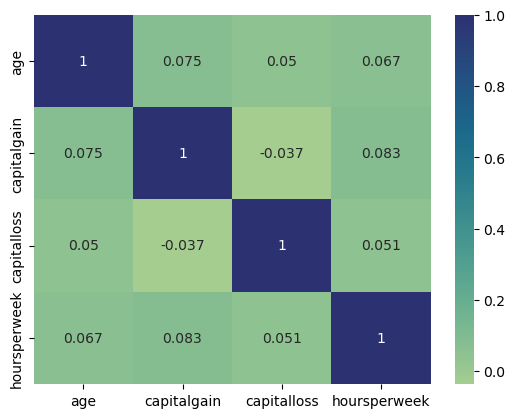

In [20]:
sb.heatmap(data_cont.corr(),cmap="crest", annot=True,)
plt.show()

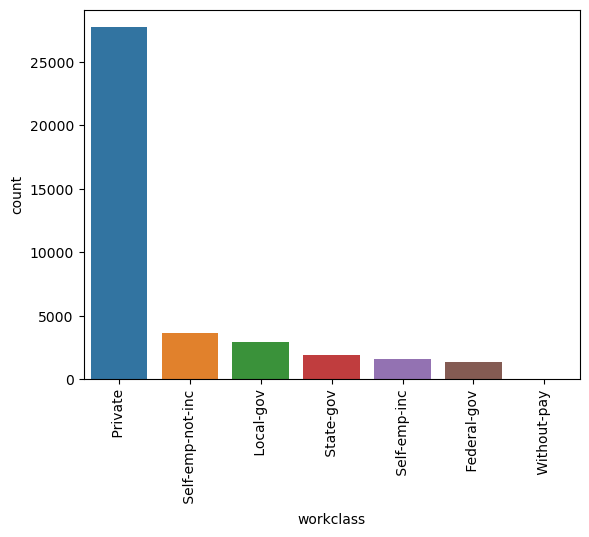

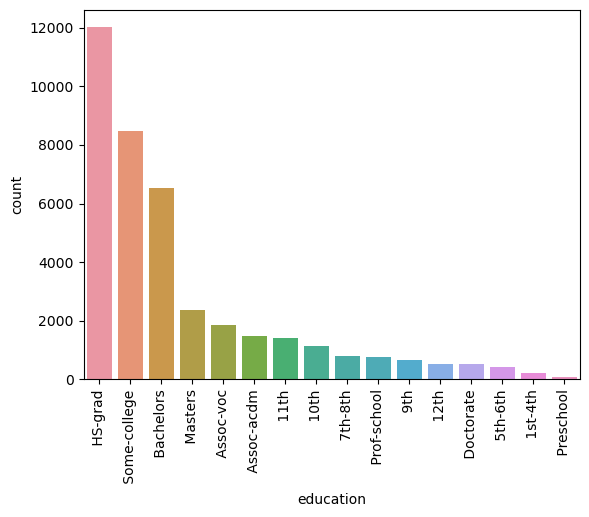

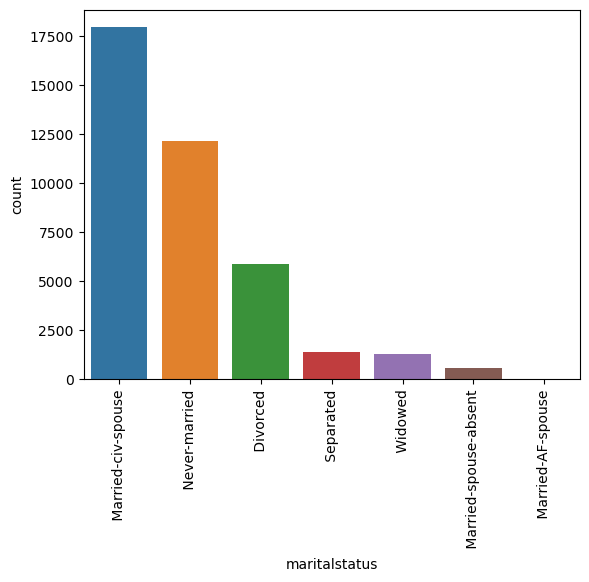

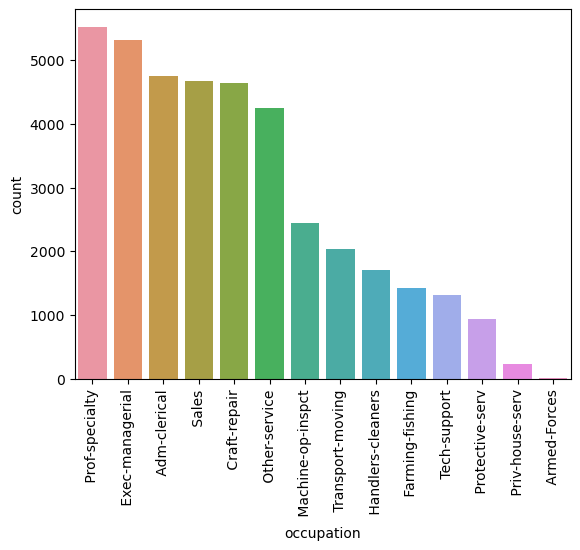

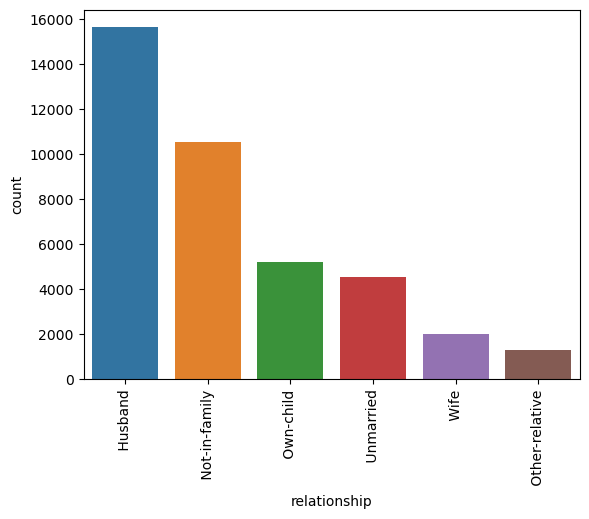

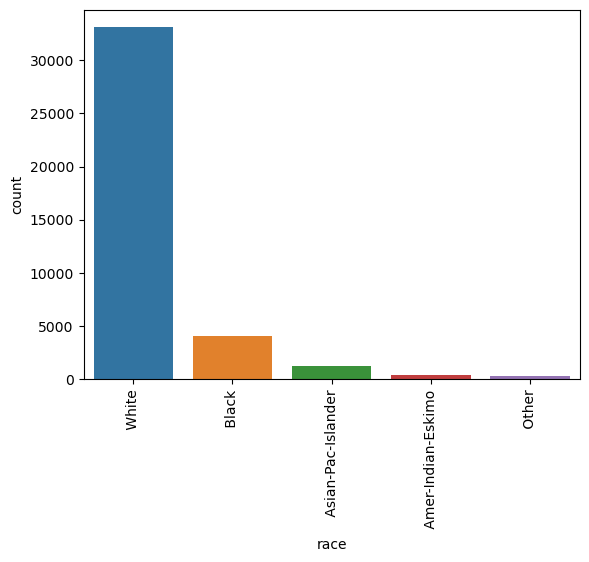

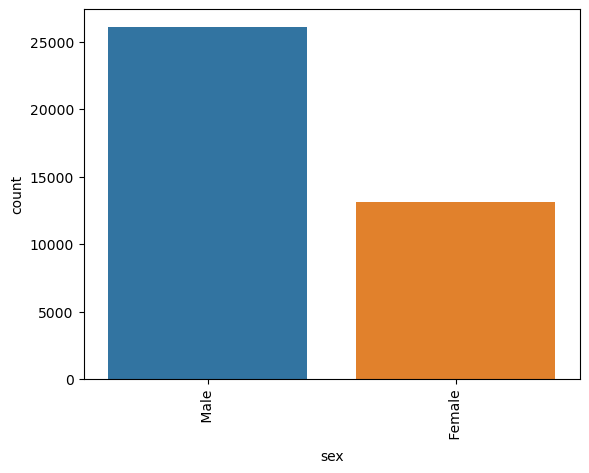

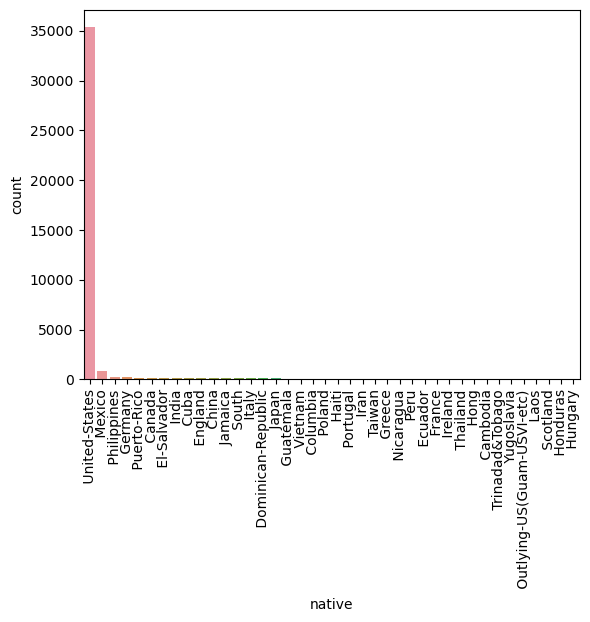

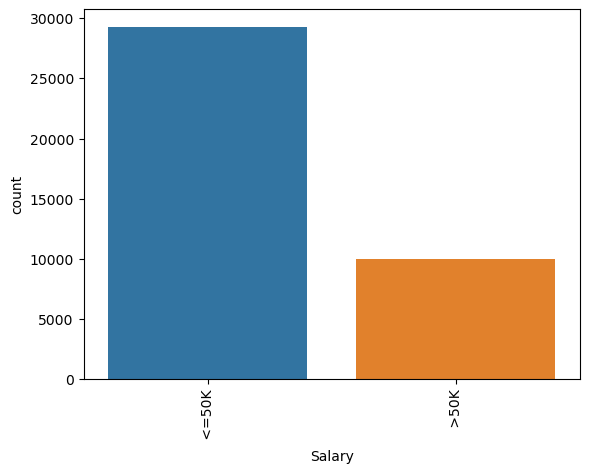

In [21]:
for feature in sal_cat.columns:
    plt.figure()
    sb.countplot(x=feature, data=sal_cat, 
              order=sal_cat[feature].value_counts().index)
    plt.xticks(rotation = 90)
plt.show()

<Figure size 640x480 with 0 Axes>

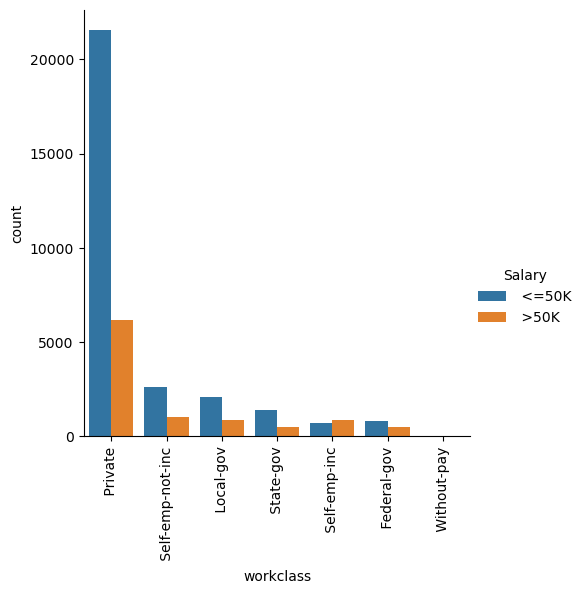

<Figure size 640x480 with 0 Axes>

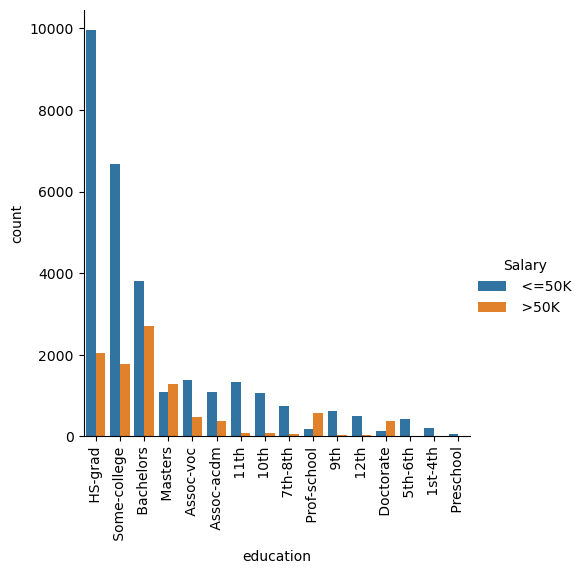

<Figure size 640x480 with 0 Axes>

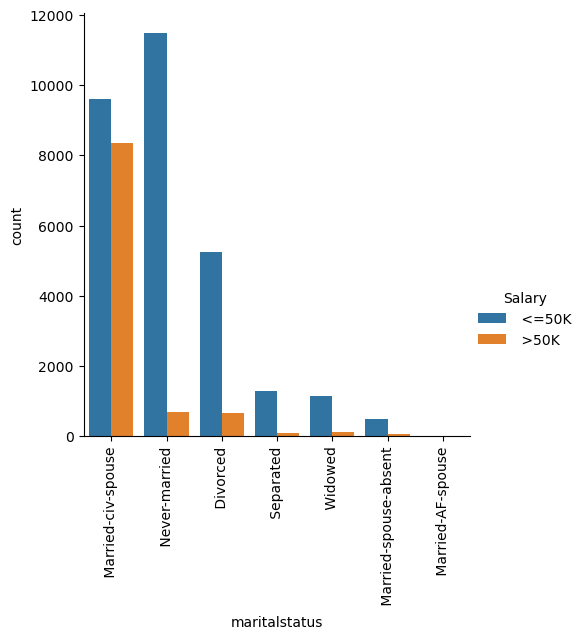

<Figure size 640x480 with 0 Axes>

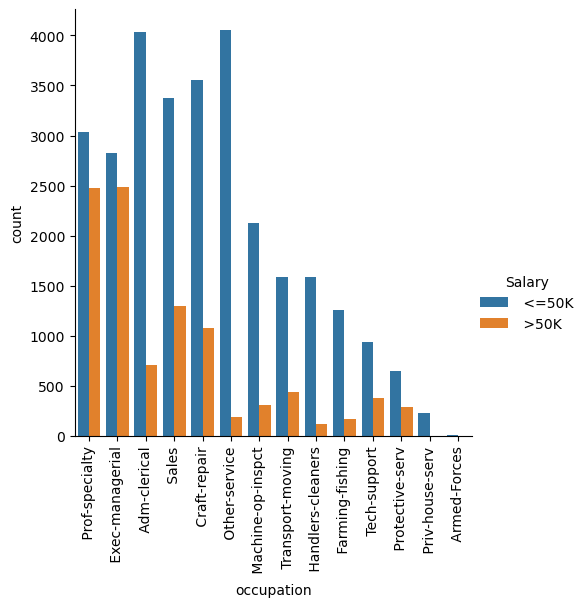

<Figure size 640x480 with 0 Axes>

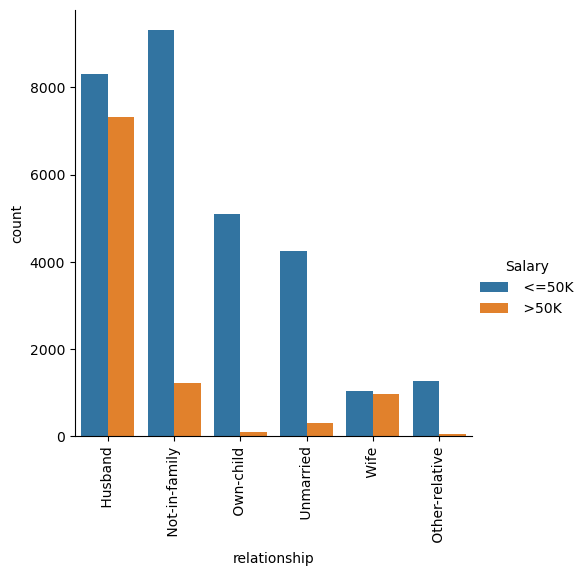

<Figure size 640x480 with 0 Axes>

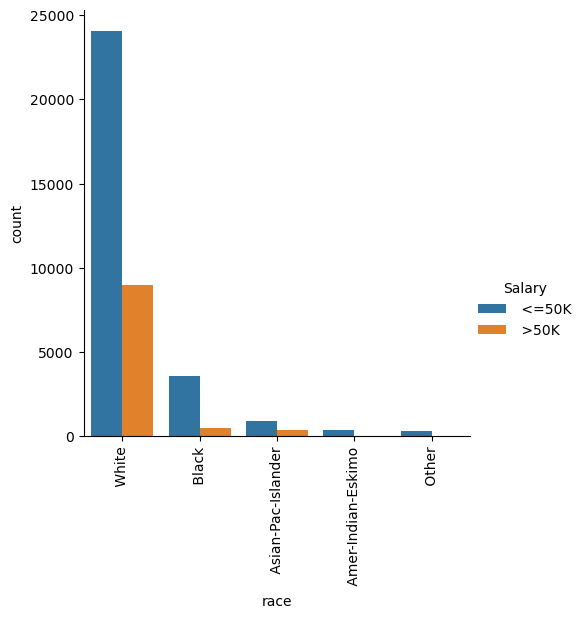

<Figure size 640x480 with 0 Axes>

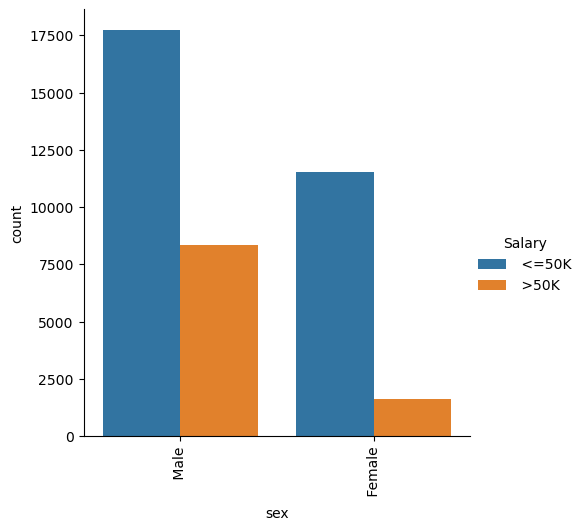

<Figure size 640x480 with 0 Axes>

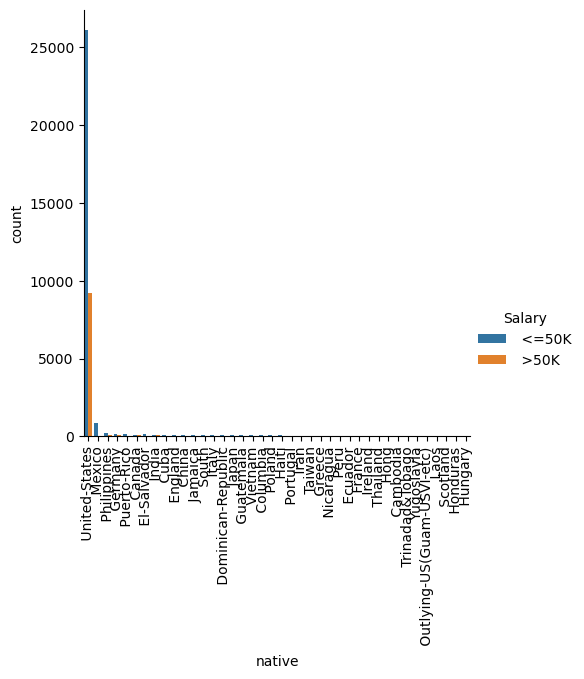

<Figure size 640x480 with 0 Axes>

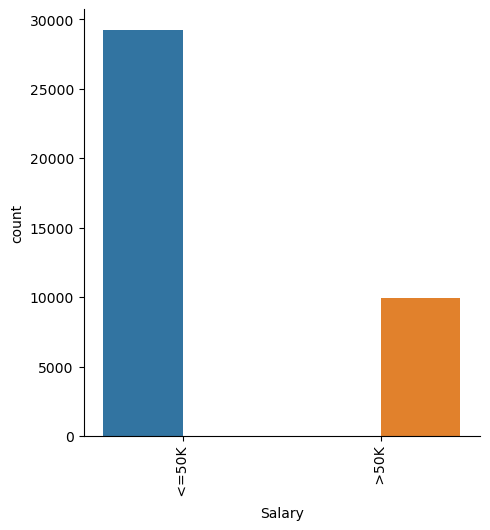

In [22]:
for feature in sal_cat.columns:
    plt.figure()
    sb.catplot(data=sal_cat,x=feature,hue="Salary",kind='count',
              order=sal_cat[feature].value_counts().index)
    plt.xticks(rotation = 90)
plt.show()

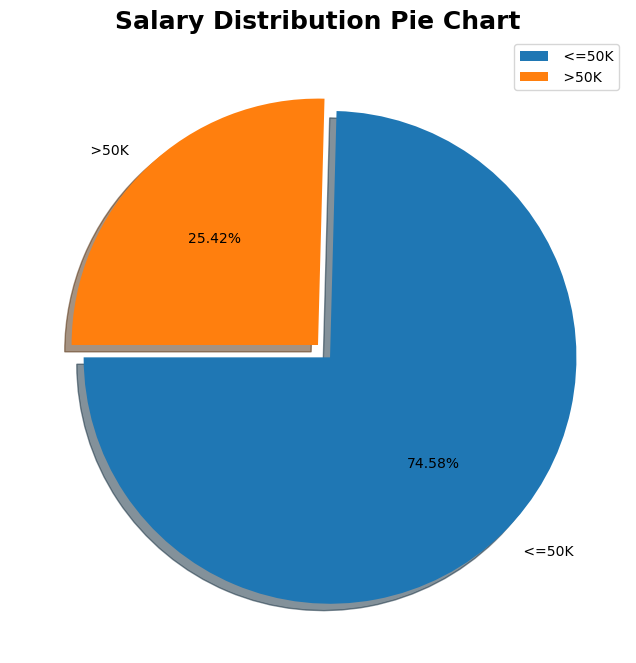

In [23]:
plt.figure(figsize = (12,8))
plt.pie(salary['Salary'].value_counts(),
       labels=salary.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        shadow= True,
       startangle= 180)
plt.legend(loc= 'upper right')
plt.title("Salary Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [24]:
#Apply Label Encoding Technique to Converting categorical variables into numerical

In [25]:
sal_cat.columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [26]:
from sklearn import preprocessing

In [27]:
encoder=preprocessing.LabelEncoder()

In [28]:
sal_copy=salary.copy()

In [29]:
sal_copy["education"]=encoder.fit_transform(sal_copy["education"])
sal_copy["workclass"]=encoder.fit_transform(sal_copy["workclass"])
sal_copy["maritalstatus"]=encoder.fit_transform(sal_copy["maritalstatus"])
sal_copy["sex"]=encoder.fit_transform(sal_copy["sex"])
sal_copy["race"]=encoder.fit_transform(sal_copy["race"])
sal_copy["occupation"]=encoder.fit_transform(sal_copy["occupation"])
sal_copy["relationship"]=encoder.fit_transform(sal_copy["relationship"])
sal_copy["native"]=encoder.fit_transform(sal_copy["native"])
sal_copy['Salary'] = np.where(sal_copy['Salary'].str.contains(" >50K"), 1, 0)

In [30]:
sal_copy

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,1,12,14,0,7,1,4,1,0,0,40,37,0
39235,33,2,9,13,4,9,3,4,1,0,0,40,37,0
39236,39,2,9,13,0,9,1,4,0,0,0,36,37,0
39237,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = sal_copy[num_feat]
sal_copy[num_feat] = scaler.fit_transform(features.values)
sal_copy

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-0.023268,5,9,1.085892,4,0,1,4,1,0.115168,-0.234655,-0.096815,37,0
1,0.803925,4,9,1.085892,2,3,0,4,1,-0.156786,-0.234655,-2.264094,37,0
2,-0.098467,2,11,-0.430872,0,5,1,4,1,-0.156786,-0.234655,-0.096815,37,0
3,1.029523,2,1,-1.189254,2,5,0,2,1,-0.156786,-0.234655,-0.096815,37,0
4,-0.850460,2,9,1.085892,2,9,5,2,0,-0.156786,-0.234655,-0.096815,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,0.653526,1,12,1.465083,0,7,1,4,1,-0.156786,-0.234655,-0.096815,37,0
39235,-0.474464,2,9,1.085892,4,9,3,4,1,-0.156786,-0.234655,-0.096815,37,0
39236,-0.023268,2,9,1.085892,0,9,1,4,0,-0.156786,-0.234655,-0.417893,37,0
39237,0.352729,2,9,1.085892,0,0,3,1,1,0.525601,-0.234655,-0.096815,37,0


In [32]:
x = sal_copy.drop('Salary', 1)
y = sal_copy['Salary']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [34]:
#Build a model using Support vector machines

In [35]:
#With Linear Kernel
mod_linear = SVC(kernel = 'linear')
mod_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
y_pred_train = mod_linear.predict(x_train)
y_pred_test  = mod_linear.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5877
           1       0.77      0.31      0.44      1971

    accuracy                           0.80      7848
   macro avg       0.79      0.64      0.66      7848
weighted avg       0.80      0.80      0.77      7848



Accuracy for Train data = 0.80437
Accuracy for Test data = 0.80339


Text(50.722222222222214, 0.5, 'Actual')

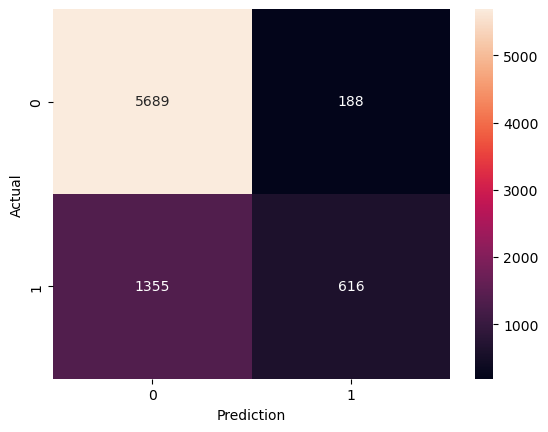

In [38]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [39]:
#with polynomial kernal

In [40]:
#With Linear Kernel
mod_poly = SVC(kernel = 'poly')
mod_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [41]:
y_pred_train = mod_poly.predict(x_train)
y_pred_test  = mod_poly.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      5877
           1       0.82      0.30      0.44      1971

    accuracy                           0.81      7848
   macro avg       0.81      0.64      0.66      7848
weighted avg       0.81      0.81      0.77      7848



Accuracy for Train data = 0.80889
Accuracy for Test data = 0.80785


Text(50.722222222222214, 0.5, 'Actual')

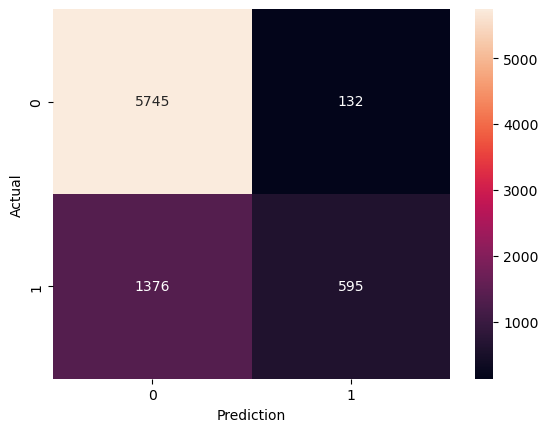

In [43]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [44]:
#with RBF kernal
model_rbf = SVC(kernel='rbf', C=1, gamma = 0.02)
model_rbf.fit(x_train,y_train)

SVC(C=1, gamma=0.02)

In [45]:
y_pred_train = model_rbf.predict(x_train)
y_pred_test  = model_rbf.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5877
           1       0.76      0.54      0.63      1971

    accuracy                           0.84      7848
   macro avg       0.81      0.74      0.76      7848
weighted avg       0.83      0.84      0.83      7848



Accuracy for Train data = 0.84129
Accuracy for Test data = 0.84098


Text(50.722222222222214, 0.5, 'Actual')

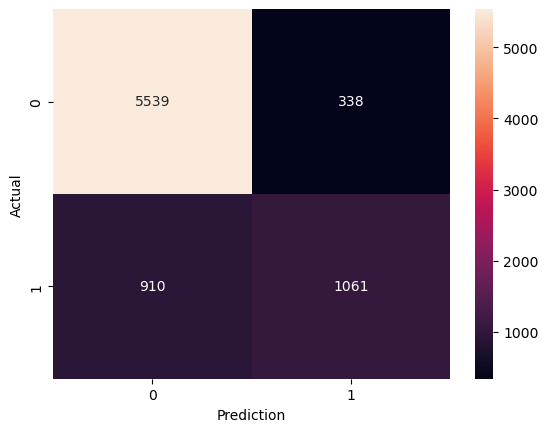

In [47]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [48]:
#with sigmoidal kernal
mod_sk = SVC(kernel='sigmoid')
mod_sk.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [49]:
y_pred_train = mod_sk.predict(x_train)
y_pred_test  = mod_sk.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      5877
           1       0.44      0.34      0.38      1971

    accuracy                           0.73      7848
   macro avg       0.62      0.60      0.60      7848
weighted avg       0.71      0.73      0.71      7848



Accuracy for Train data = 0.73171
Accuracy for Test data = 0.72579


Text(50.722222222222214, 0.5, 'Actual')

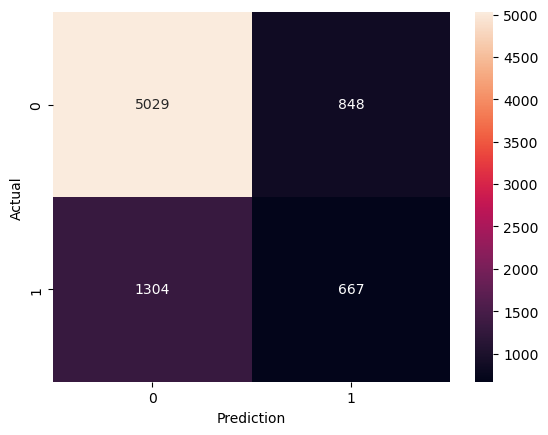

In [51]:
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),5))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),5))

conf_matrix = confusion_matrix(y_test,y_pred_test)

sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [52]:
#Model using RBF Kernel gave the highest accuracy. Hence select this model.